<a href="https://colab.research.google.com/github/Abubaker-Nafe/Vision-Ass2/blob/main/VisionAss2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries needed**

In [ ]:
from google.colab import drive
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
!pip install opencv-contrib-python==4.5.5.64


#Dataset Reading

**Reading the dataset from google drive**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Define the dataset path in Google Drive
dataset_path = '/content/drive/My Drive/Dataset/isolated_words_per_user'

# Function to load images from the dataset
def load_dataset(dataset_path):
    data = []
    labels = []
    for user_folder in os.listdir(dataset_path):
        user_path = os.path.join(dataset_path, user_folder)
        if os.path.isdir(user_path):  # Check if it's a directory
            for image_file in os.listdir(user_path):
                image_path = os.path.join(user_path, image_file)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    data.append(image)
                    labels.append(user_folder)  # Use folder name as label
    return data, labels

# Load the dataset
images, labels = load_dataset(dataset_path)
print(f"Loaded {len(images)} images from the dataset.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded 8144 images from the dataset.


**Displaying the first and last 5 images in the dataset to make sure everything is alright**

									First 5 images:


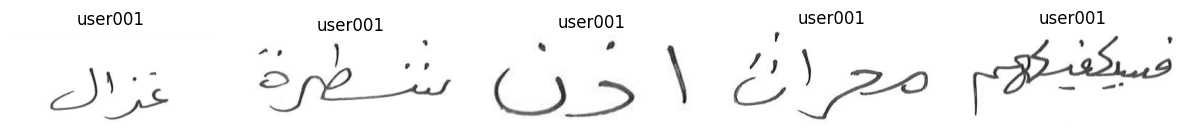

									Last 5 images:


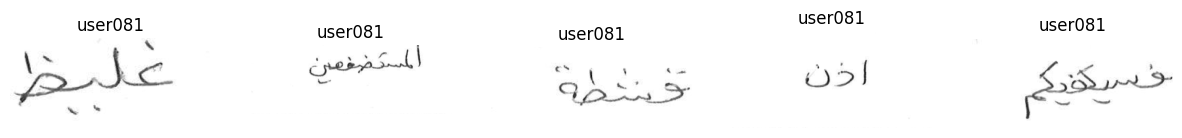

In [ ]:
# Show some example images
def show_example_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

# Display the first 5 images and their labels
print("\t\t\t\t\t\t\t\t\tFirst 5 images:")
show_example_images(images, labels, num_images=5)

# Show last 5 images
def show_last_example_images(images, labels, num_images=5):
    # Get the last 'num_images' images and labels using slicing
    images_to_show = images[-num_images:]
    labels_to_show = labels[-num_images:]

    # Plot the images
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images_to_show[i], cmap='gray')
        plt.title(labels_to_show[i])
        plt.axis('off')
    plt.show()

# Display the last 5 images and their labels
print("\t\t\t\t\t\t\t\t\tLast 5 images:")
show_last_example_images(images, labels, num_images=5)

In [ ]:
# Print the size of the first image in the dataset
print(f"Size of the first image: {images[26].shape}")

Size of the first image: (128, 448)


#Data Preprocessing

**Data Preprocessing:**
- **Resize all images to a common size.**
- **Normalize pixel values.**
- **Apply histogram equalization to handle illumination differences.**

In [ ]:
def preprocess_image(image, size=(128, 128)):
    # Resize image
    resized_image = cv2.resize(image, size)
    # Normalize pixel values
    normalized_image = cv2.normalize(resized_image, None, 0, 255, cv2.NORM_MINMAX)
    return normalized_image

# Preprocess all images
preprocessed_images = [preprocess_image(img) for img in images]


In [ ]:
# Print the size of the first image in the dataset
print(f"Size of the first image: {preprocessed_images[26].shape}")

Size of the first image: (128, 128)


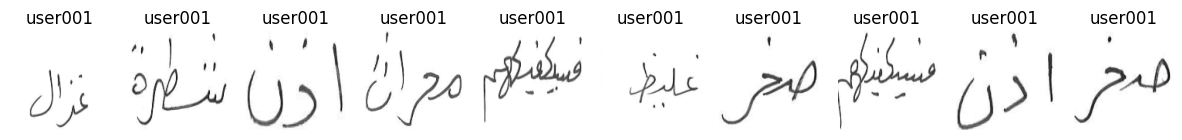

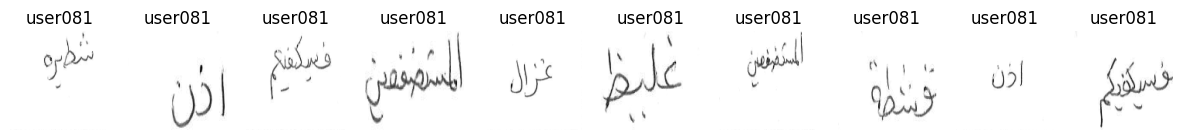

In [ ]:
show_example_images(preprocessed_images, labels, num_images=10)
show_last_example_images(preprocessed_images, labels, num_images=10)

#SURF and SIFT

In [ ]:
def extract_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Example usage
example_image = preprocessed_images[0]
sift_kp, sift_desc = extract_sift_features(example_image)
print(f"Detected {len(sift_kp)} key points using SIFT.")


Detected 28 key points using SIFT.
